In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


### Section 1 a

### 1 Pre-processing for Feature Selection

Refer to __[Feature Selection with Sklearn](https://scikit-learn.org/stable/modules/feature_selection.html)__ for more details of any operation on Numpy array objects.

#### a. Checking data types

In [2]:
# from google.colab import drive

# drive.mount('/content/drive')
# drive_path = '/content/drive/MyDrive/rep_Python/Shared_with_learners/Datasets/'
# data1 = pd.read_excel(drive_path + 'Housing.xlsx')

data1 = pd.read_excel('Datasets/Housing.xlsx')
data1

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000,5850,3.0,1,2,NaN,no,yes,no,no,1,no
1,2,38500,4000,2.0,1,1,NaN,no,no,no,no,0,no
2,3,49500,3060,NaN,1,1,NaN,no,no,no,no,0,no
3,4,60500,6650,NaN,1,2,NaN,yes,no,no,no,0,no
4,5,61000,6360,2.0,1,1,NaN,no,no,no,no,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,500,65000,8400,4.0,1,4,yes,no,no,no,no,3,no
547,501,67900,6440,2.0,1,1,yes,no,no,no,yes,3,no
548,502,68500,8100,4.0,1,4,yes,no,yes,no,yes,2,no
549,503,70000,6720,3.0,1,1,yes,no,no,no,no,0,no


In [3]:
data1.info()
data1.price.unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  551 non-null    int64  
 1   price       551 non-null    int64  
 2   lotsize     551 non-null    int64  
 3   bedrooms    537 non-null    float64
 4   bathrms     551 non-null    int64  
 5   stories     551 non-null    int64  
 6   driveway    537 non-null    object 
 7   recroom     551 non-null    object 
 8   fullbase    551 non-null    object 
 9   gashw       551 non-null    object 
 10  airco       551 non-null    object 
 11  garagepl    551 non-null    int64  
 12  prefarea    551 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 56.1+ KB


array([ 42000,  38500,  49500,  60500,  61000,  66000,  69000,  83800,
        88500,  90000,  30500,  27000,  36000,  37000,  37900,  40500,
        40750,  45000,  48500,  65900,  38000,  42300,  43500,  44000,
        44500,  44900,  48000,  49000,  51500,  61700,  67000,  82000,
        54500,  66500,  70000,  92000,  41000,  43000,  54800,  55000,
        57000,  68000,  95000,  25000,  25245,  56000,  35500,  30000,
        52000,  54000,  60000,  47000,  51000,  32500,  34000,  35000,
        63900,  50000,  55500,  78000,  58000, 163000, 128000, 123500,
        39000,  53900,  59900,  79000, 125000, 132000,  58500,  73000,
        63500,  46500,  75000,  85000,  93000,  94500, 106500, 116000,
        61500,  80000,  59500, 117000, 122500, 127000,  49900,  50500,
        65000,  46000,  26500,  40000,  57250,  62000,  63000, 130000,
        52900,  73500,  52500,  32000,  57500,  69900,  74500,  28000,
        44700,  33000,  34400,  53000,  69500,  72000,  92500,  47900,
      

#### b. Checking Duplicates

In [4]:
### Remove Rows if there are duplicates
data1.duplicated()
print(data1[ data1.duplicated() ])
data1.drop_duplicates(inplace = True)
# print(data1.shape)

data1.tail()

     Unnamed: 0  price  lotsize  bedrooms  bathrms  stories driveway recroom  \
546         500  65000     8400       4.0        1        4      yes      no   
547         501  67900     6440       2.0        1        1      yes      no   
548         502  68500     8100       4.0        1        4      yes      no   
549         503  70000     6720       3.0        1        1      yes      no   
550         504  70500     5948       3.0        1        2      yes      no   

    fullbase gashw airco  garagepl prefarea  
546       no    no    no         3       no  
547       no    no   yes         3       no  
548      yes    no   yes         2       no  
549       no    no    no         0       no  
550       no    no   yes         0       no  


,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
541,542,91500,4800,3.0,2,4,yes,yes,no,no,yes,0,no
542,543,94000,6000,3.0,2,4,yes,no,no,no,yes,0,no
543,544,103000,6000,3.0,2,4,yes,yes,no,no,yes,1,no
544,545,105000,6000,3.0,2,2,yes,yes,no,no,yes,1,no
545,546,105000,6000,3.0,1,2,yes,no,no,no,yes,1,no


In [5]:
print(data1.shape)

(546, 13)


#### c. Handle missing values

In [6]:
### Remove Rows with NaN values 
data1.dropna(inplace = True)
print(data1.shape)

(527, 13)


In [7]:
data1.tail()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
541,542,91500,4800,3.0,2,4,yes,yes,no,no,yes,0,no
542,543,94000,6000,3.0,2,4,yes,no,no,no,yes,0,no
543,544,103000,6000,3.0,2,4,yes,yes,no,no,yes,1,no
544,545,105000,6000,3.0,2,2,yes,yes,no,no,yes,1,no
545,546,105000,6000,3.0,1,2,yes,no,no,no,yes,1,no


In [8]:
data1.reset_index(inplace = True)
print(data1.shape)
data1.tail()

(527, 14)


,index,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
522,541,542,91500,4800,3.0,2,4,yes,yes,no,no,yes,0,no
523,542,543,94000,6000,3.0,2,4,yes,no,no,no,yes,0,no
524,543,544,103000,6000,3.0,2,4,yes,yes,no,no,yes,1,no
525,544,545,105000,6000,3.0,2,2,yes,yes,no,no,yes,1,no
526,545,546,105000,6000,3.0,1,2,yes,no,no,no,yes,1,no


In [9]:
### Remove first two columns
data1.drop(data1.columns[0:2],inplace = True, axis=1)
print(data1.tail())

      price  lotsize  bedrooms  bathrms  stories driveway recroom fullbase  \
522   91500     4800       3.0        2        4      yes     yes       no   
523   94000     6000       3.0        2        4      yes      no       no   
524  103000     6000       3.0        2        4      yes     yes       no   
525  105000     6000       3.0        2        2      yes     yes       no   
526  105000     6000       3.0        1        2      yes      no       no   

    gashw airco  garagepl prefarea  
522    no   yes         0       no  
523    no   yes         0       no  
524    no   yes         1       no  
525    no   yes         1       no  
526    no   yes         1       no  


In [10]:
print(data1.shape)
data1.info()

(527, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     527 non-null    int64  
 1   lotsize   527 non-null    int64  
 2   bedrooms  527 non-null    float64
 3   bathrms   527 non-null    int64  
 4   stories   527 non-null    int64  
 5   driveway  527 non-null    object 
 6   recroom   527 non-null    object 
 7   fullbase  527 non-null    object 
 8   gashw     527 non-null    object 
 9   airco     527 non-null    object 
 10  garagepl  527 non-null    int64  
 11  prefarea  527 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 49.5+ KB


#### d. Data Encoding

In [11]:
### Convert object types here to category ['driveway', 'recroom', 'fullbase', 'gashw', 'airco','prefarea']
list_str_obj_cols = data1.columns[data1.dtypes == "object"].tolist()
for str_obj_col in list_str_obj_cols:
    data1[str_obj_col] = data1[str_obj_col].astype("category")
data1.dtypes

price          int64
lotsize        int64
bedrooms     float64
bathrms        int64
stories        int64
driveway    category
recroom     category
fullbase    category
gashw       category
airco       category
garagepl       int64
prefarea    category
dtype: object

In [12]:
### Creating new dataframe to contain one-hot encoded data
data = pd.get_dummies(data1)
print(data.shape)
data.dtypes

(527, 18)


price             int64
lotsize           int64
bedrooms        float64
bathrms           int64
stories           int64
garagepl          int64
driveway_no       uint8
driveway_yes      uint8
recroom_no        uint8
recroom_yes       uint8
fullbase_no       uint8
fullbase_yes      uint8
gashw_no          uint8
gashw_yes         uint8
airco_no          uint8
airco_yes         uint8
prefarea_no       uint8
prefarea_yes      uint8
dtype: object

In [13]:
print(data.columns)
data

Index(['price', 'lotsize', 'bedrooms', 'bathrms', 'stories', 'garagepl',
       'driveway_no', 'driveway_yes', 'recroom_no', 'recroom_yes',
       'fullbase_no', 'fullbase_yes', 'gashw_no', 'gashw_yes', 'airco_no',
       'airco_yes', 'prefarea_no', 'prefarea_yes'],
      dtype='object')


,price,lotsize,bedrooms,bathrms,stories,garagepl,driveway_no,driveway_yes,recroom_no,recroom_yes,fullbase_no,fullbase_yes,gashw_no,gashw_yes,airco_no,airco_yes,prefarea_no,prefarea_yes
0,30500,3000,2.0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0
1,40750,5200,4.0,1,3,0,0,1,1,0,1,0,1,0,1,0,1,0
2,45000,3450,1.0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0
3,45000,3986,2.0,2,1,1,1,0,0,1,0,1,1,0,1,0,1,0
4,48500,4785,3.0,1,2,1,0,1,0,1,0,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,91500,4800,3.0,2,4,0,0,1,0,1,1,0,1,0,0,1,1,0
523,94000,6000,3.0,2,4,0,0,1,1,0,1,0,1,0,0,1,1,0
524,103000,6000,3.0,2,4,1,0,1,0,1,1,0,1,0,0,1,1,0
525,105000,6000,3.0,2,2,1,0,1,0,1,1,0,1,0,0,1,1,0


#### e. Scaling

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# list_num_cols = data1.columns[ (data1.dtypes == "int64") | (data1.dtypes == "float64") ].to_list()
list_num_cols = ['lotsize','bedrooms','bathrms','stories','garagepl','price']
# data_scaled = scaler.fit_transform(data1[list_num_cols].to_numpy())

data_scaled = scaler.fit_transform(data1[list_num_cols])
print(type(data_scaled))

# # data_scaled = scaler.fit_transform(data1[['lotsize','bedrooms','bathrms','stories','garagepl','price']].to_numpy())
df_scaled = pd.DataFrame(data_scaled, columns= list_num_cols)
 
print("Scaled Dataset Using MinMaxScaler")
df_scaled.tail()


<class 'numpy.ndarray'>
Scaled Dataset Using MinMaxScaler


,lotsize,bedrooms,bathrms,stories,garagepl,price
522,0.216495,0.4,0.333333,1.000000,0.000000,0.403030
523,0.298969,0.4,0.333333,1.000000,0.000000,0.418182
524,0.298969,0.4,0.333333,1.000000,0.333333,0.472727
525,0.298969,0.4,0.333333,0.333333,0.333333,0.484848
526,0.298969,0.4,0.000000,0.333333,0.333333,0.484848


In [15]:
for each in df_scaled.columns:
    data[each] = df_scaled[each]
data

,price,lotsize,bedrooms,bathrms,stories,garagepl,driveway_no,driveway_yes,recroom_no,recroom_yes,fullbase_no,fullbase_yes,gashw_no,gashw_yes,airco_no,airco_yes,prefarea_no,prefarea_yes
0,0.033333,0.092784,0.2,0.000000,0.000000,0.000000,1,0,1,0,1,0,1,0,1,0,1,0
1,0.095455,0.243986,0.6,0.000000,0.666667,0.000000,0,1,1,0,1,0,1,0,1,0,1,0
2,0.121212,0.123711,0.0,0.000000,0.000000,0.000000,0,1,1,0,1,0,1,0,1,0,1,0
3,0.121212,0.160550,0.2,0.333333,0.000000,0.333333,1,0,0,1,0,1,1,0,1,0,1,0
4,0.142424,0.215464,0.4,0.000000,0.333333,0.333333,0,1,0,1,0,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,0.403030,0.216495,0.4,0.333333,1.000000,0.000000,0,1,0,1,1,0,1,0,0,1,1,0
523,0.418182,0.298969,0.4,0.333333,1.000000,0.000000,0,1,1,0,1,0,1,0,0,1,1,0
524,0.472727,0.298969,0.4,0.333333,1.000000,0.333333,0,1,0,1,1,0,1,0,0,1,1,0
525,0.484848,0.298969,0.4,0.333333,0.333333,0.333333,0,1,0,1,1,0,1,0,0,1,1,0


### 2 Data Preparation

#### a. Separate dependent and independent variables

In [16]:
## y is dependent variable and X is set of independent variables.
y = data['price']
 # Load X Variables into a Pandas Dataframe with columns 
X = data.drop(['price'], axis = 1)
print(y.shape)
print(X.shape)

(527,)
(527, 17)


In [17]:
print(type(y))
print(type(X))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [18]:
print(X.columns)

Index(['lotsize', 'bedrooms', 'bathrms', 'stories', 'garagepl', 'driveway_no',
       'driveway_yes', 'recroom_no', 'recroom_yes', 'fullbase_no',
       'fullbase_yes', 'gashw_no', 'gashw_yes', 'airco_no', 'airco_yes',
       'prefarea_no', 'prefarea_yes'],
      dtype='object')


#### b. Split the data into train and test data

In [19]:
## Split the data into train and test data
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.20)   
X_train, X_test, y_train, y_test = train_test_split (X, y, random_state= 210, test_size=0.20)   ### 'random_state' parameter similar to seed()

# ## IF IT IS A CLASSIFICATION PROBLEM, 
# ## Use stratify parameter to get proportionate samples of both classes in train and test
# ## Stratified SAMPLING
# X_train, X_test, y_train, y_test = train_test_split (X, y,random_state=20, test_size=0.2,stratify=y)   

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


X_train.tail(3)
X_train.head(3)

(421, 17)
(106, 17)
(421,)
(106,)


,lotsize,bedrooms,bathrms,stories,garagepl,driveway_no,driveway_yes,recroom_no,recroom_yes,fullbase_no,fullbase_yes,gashw_no,gashw_yes,airco_no,airco_yes,prefarea_no,prefarea_yes
111,0.219244,0.2,0.000000,0.333333,0.000000,0,1,1,0,1,0,1,0,1,0,1,0
105,0.169759,0.2,0.000000,0.000000,0.333333,0,1,1,0,0,1,1,0,1,0,1,0
499,0.315464,0.6,0.333333,0.333333,0.333333,0,1,1,0,1,0,1,0,0,1,1,0


In [20]:
### IF IT IS A CLASSIFICATION PROBLEM, , check for value_counts()
# print(y.value_counts())
# print(y_train.value_counts())
# print(y_test.value_counts())

In [21]:
X_train.head(3)

,lotsize,bedrooms,bathrms,stories,garagepl,driveway_no,driveway_yes,recroom_no,recroom_yes,fullbase_no,fullbase_yes,gashw_no,gashw_yes,airco_no,airco_yes,prefarea_no,prefarea_yes
111,0.219244,0.2,0.000000,0.333333,0.000000,0,1,1,0,1,0,1,0,1,0,1,0
105,0.169759,0.2,0.000000,0.000000,0.333333,0,1,1,0,0,1,1,0,1,0,1,0
499,0.315464,0.6,0.333333,0.333333,0.333333,0,1,1,0,1,0,1,0,0,1,1,0


### 3 Feature Selection Methods

#### a. Using Pearson Correlation Coefficient with TARGET variable

In [22]:
# Using Pearson Correlation
### Unsupervised
num_features = 5
corr_with_target = X_train.corrwith(y_train)
corr_with_target

lotsize         0.547059
bedrooms        0.365344
bathrms         0.509435
stories         0.447148
garagepl        0.373560
driveway_no    -0.289718
driveway_yes    0.289718
recroom_no     -0.247317
recroom_yes     0.247317
fullbase_no    -0.174894
fullbase_yes    0.174894
gashw_no       -0.070596
gashw_yes       0.070596
airco_no       -0.464823
airco_yes       0.464823
prefarea_no    -0.342233
prefarea_yes    0.342233
dtype: float64

In [23]:
selected_features = corr_with_target.sort_values(ascending=False).head(num_features).index.tolist()
type(selected_features)
selected_features

['lotsize', 'bathrms', 'airco_yes', 'stories', 'garagepl']

In [24]:
cor_series = corr_with_target.sort_values(ascending=False)

In [25]:
selected_features = cor_series.head(7).index.tolist()

In [26]:
selected_train_df=pd.DataFrame(X_train[selected_features])
print(selected_train_df)

# OBSERVATIONS: VERY IMPORTANT
# apply same scaling and encoding to test data and then select same features

      lotsize   bathrms  airco_yes   stories  garagepl  bedrooms  prefarea_yes
111  0.219244  0.000000          0  0.333333  0.000000       0.2             0
105  0.169759  0.000000          0  0.000000  0.333333       0.2             0
499  0.315464  0.333333          1  0.333333  0.333333       0.6             0
129  0.216495  0.333333          0  0.666667  0.000000       0.8             0
354  0.336082  0.333333          1  0.333333  0.666667       0.6             1
..        ...       ...        ...       ...       ...       ...           ...
30   0.116838  0.000000          0  0.333333  0.000000       0.4             0
115  0.145017  0.000000          0  0.000000  0.666667       0.4             0
133  0.134021  0.333333          0  0.333333  0.333333       0.2             0
103  0.189003  0.000000          0  0.000000  0.000000       0.2             0
522  0.216495  0.333333          1  1.000000  0.000000       0.4             0

[421 rows x 7 columns]


#### b.  Correlation among independent variables

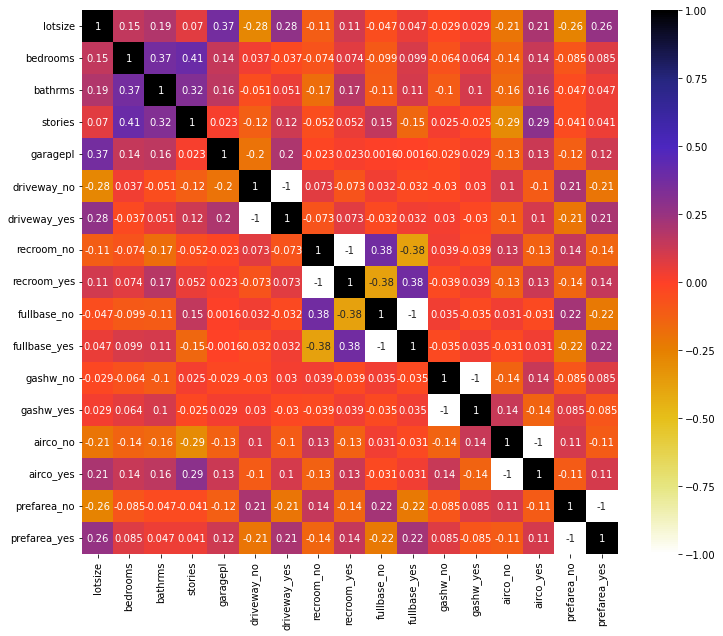

In [27]:
####  OR   ####
# Compute correlation matrix (Correlation among independent variables)
corr_matrix = X_train.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()

In [28]:
corr_matrix

,lotsize,bedrooms,bathrms,stories,garagepl,driveway_no,driveway_yes,recroom_no,recroom_yes,fullbase_no,fullbase_yes,gashw_no,gashw_yes,airco_no,airco_yes,prefarea_no,prefarea_yes
lotsize,1.000000,0.149589,0.190344,0.070488,0.368454,-0.277553,0.277553,-0.113625,0.113625,-0.046896,0.046896,-0.029081,0.029081,-0.205866,0.205866,-0.259191,0.259191
bedrooms,0.149589,1.000000,0.369180,0.405116,0.140774,0.037140,-0.037140,-0.074404,0.074404,-0.098760,0.098760,-0.064077,0.064077,-0.137065,0.137065,-0.084680,0.084680
bathrms,0.190344,0.369180,1.000000,0.323123,0.159545,-0.051114,0.051114,-0.172261,0.172261,-0.107285,0.107285,-0.103504,0.103504,-0.157150,0.157150,-0.046752,0.046752
stories,0.070488,0.405116,0.323123,1.000000,0.022809,-0.117593,0.117593,-0.052397,0.052397,0.149817,-0.149817,0.025380,-0.025380,-0.290382,0.290382,-0.040578,0.040578
garagepl,0.368454,0.140774,0.159545,0.022809,1.000000,-0.201803,0.201803,-0.023114,0.023114,0.001624,-0.001624,-0.028980,0.028980,-0.128264,0.128264,-0.124923,0.124923
driveway_no,-0.277553,0.037140,-0.051114,-0.117593,-0.201803,1.000000,-1.000000,0.073305,-0.073305,0.031554,-0.031554,-0.030271,0.030271,0.104643,-0.104643,0.210562,-0.210562
driveway_yes,0.277553,-0.037140,0.051114,0.117593,0.201803,-1.000000,1.000000,-0.073305,0.073305,-0.031554,0.031554,0.030271,-0.030271,-0.104643,0.104643,-0.210562,0.210562
recroom_no,-0.113625,-0.074404,-0.172261,-0.052397,-0.023114,0.073305,-0.073305,1.000000,-1.000000,0.375982,-0.375982,0.038762,-0.038762,0.129169,-0.129169,0.140640,-0.140640
recroom_yes,0.113625,0.074404,0.172261,0.052397,0.023114,-0.073305,0.073305,-1.000000,1.000000,-0.375982,0.375982,-0.038762,0.038762,-0.129169,0.129169,-0.140640,0.140640
fullbase_no,-0.046896,-0.098760,-0.107285,0.149817,0.001624,0.031554,-0.031554,0.375982,-0.375982,1.000000,-1.000000,0.034741,-0.034741,0.031294,-0.031294,0.221048,-0.221048


In [29]:
# Finding the correlated features
def correlation(dataset, threshold):
    corr_pairs = tuple() 
    all_pairs = []
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                print(abs(corr_matrix.iloc[i, j]))
                corr_pairs = (corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])  
                all_pairs.append(corr_pairs)
    return all_pairs  

In [30]:
# B) Which independent features have maximum correlation with target variable?
### They are most important
corr_feature_pairs = correlation(X_train, 0.4)   ### Here, 0.6 is a threshold
corr_feature_pairs

0.40511648078792345
1.0000000000000002
1.0000000000000002
0.9999999999999997
0.9999999999999999
1.0
1.0000000000000002


[('stories', 'bedrooms', 0.40511648078792345),
 ('driveway_yes', 'driveway_no', -1.0000000000000002),
 ('recroom_yes', 'recroom_no', -1.0000000000000002),
 ('fullbase_yes', 'fullbase_no', -0.9999999999999997),
 ('gashw_yes', 'gashw_no', -0.9999999999999999),
 ('airco_yes', 'airco_no', -1.0),
 ('prefarea_yes', 'prefarea_no', -1.0000000000000002)]

In [31]:
corr_features_to_drop = [ 'bedrooms','driveway_yes',  'recroom_yes', 
                         'fullbase_yes','gashw_no', 'airco_yes', 'prefarea_yes','bedrooms']

In [32]:
print(X_train.shape)
print(X_test.shape)

(421, 17)
(106, 17)


In [33]:
# Removing correlated features
print(X_train.shape)
print(X_test.shape)

X_train.drop(corr_features_to_drop,axis=1) # inplace=True)
X_test.drop(corr_features_to_drop,axis=1) # inplace=True)

print(X_train.shape)
print(X_test.shape)

(421, 17)
(106, 17)
(421, 17)
(106, 17)


##### c. Chi-squared for Feature Selection using SelectKBest with Score Functions

#### Correct score functions to be used are:

For regression: f_regression, mutual_info_regression

For classification: chi2, f_classif, mutual_info_classif

IMPORTANT NOTE:  
Beware not to use a regression scoring function with a classification problem, 
you will get useless results.

In [34]:
# Selecting k best features
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression
from sklearn.feature_selection import mutual_info_regression   ## for Mutual Information

### For Classification Task
# from sklearn.feature_selection import mutual_info_classif   ## for Mutual Information
# from sklearn.feature_selection import chi2   ## for Chi-squared test
# from sklearn.feature_selection import f_classif   ## for ANOVA based test

In [35]:
#No we Will select the top k important features
sel_cols = SelectKBest(f_regression, k=7)

sel_cols.fit(X_train, y_train)

SelectKBest(k=7, score_func=<function f_regression at 0x00000158EE848940>)

In [36]:
X_train.columns

Index(['lotsize', 'bedrooms', 'bathrms', 'stories', 'garagepl', 'driveway_no',
       'driveway_yes', 'recroom_no', 'recroom_yes', 'fullbase_no',
       'fullbase_yes', 'gashw_no', 'gashw_yes', 'airco_no', 'airco_yes',
       'prefarea_no', 'prefarea_yes'],
      dtype='object')

In [37]:
print(X_train.columns[sel_cols.get_support()])

sel_cols.get_support()

Index(['lotsize', 'bedrooms', 'bathrms', 'stories', 'garagepl', 'airco_no',
       'airco_yes'],
      dtype='object')


array([ True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False,  True,  True, False, False])

##### d. Chi-squared for Feature Selection using SelectPercentile with Score Functions

In [38]:
#No we Will select the top k important features
sel_cols = SelectPercentile(f_regression, percentile=40)

sel_cols.fit(X_train, y_train)

SelectPercentile(percentile=40,
                 score_func=<function f_regression at 0x00000158EE848940>)

In [39]:
print(X_train.columns[sel_cols.get_support()])

sel_cols.get_support()

Index(['lotsize', 'bedrooms', 'bathrms', 'stories', 'garagepl', 'airco_no',
       'airco_yes'],
      dtype='object')


array([ True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False,  True,  True, False, False])

#### e. Wrapper based Recursive feature elimination (RFE)

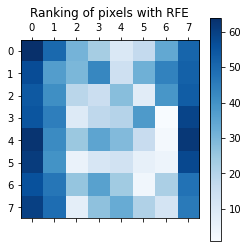

In [40]:
'''
Recursive feature elimination (RFE)
Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), 
the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller 
and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature
is obtained either through any specific attribute (such as coef_, feature_importances_) or callable. Then, the least important 
features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired 
number of features to select is eventually reached.

RFECV performs RFE in a cross-validation loop to find the optimal number of features.

Examples:

A) Recursive feature elimination: A recursive feature elimination example showing the relevance of pixels in a 
digit classification task.

B) Recursive feature elimination with cross-validation: A recursive feature elimination example with automatic tuning 
of the number of features selected with cross-validation.
'''

## A) Recursive feature elimination here
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Load the digits dataset
digits = load_digits()
X = digits.images.reshape((len(digits.images), -1))
y = digits.target

# Create the RFE object and rank each pixel
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=1, step=1)
rfe.fit(X, y)
ranking = rfe.ranking_.reshape(digits.images[0].shape)

# Plot pixel ranking
plt.matshow(ranking, cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Ranking of pixels with RFE")
plt.show()



#### f. Ensemble based Tree Algorithm to get an idea of important Features

In [41]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
X.shape          



(150, 4)

In [42]:
from sklearn.datasets import load_iris
from sklearn.tree import ExtraTreeClassifier
from sklearn.feature_selection import SelectFromModel
X, y = load_iris(return_X_y=True)
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [43]:
clf = ExtraTreeClassifier()
clf = clf.fit(X, y)

In [44]:
clf.feature_importances_  

array([0.        , 0.02171429, 0.30293798, 0.67534773])

In [45]:
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape  

(150, 2)

In [46]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [47]:
X_new

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

#### g. Knowing which features are used by decision tree Regressor 

In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
        


In [49]:
dtr = DecisionTreeRegressor()
dtr = dtr.fit(X_train, y_train)

In [50]:
dtr.feature_importances_  

array([4.59816421e-01, 4.32814336e-02, 1.49387503e-01, 7.71395346e-02,
       6.91898367e-02, 5.06378749e-03, 9.71426407e-03, 4.41127586e-04,
       4.56830401e-03, 2.91052607e-02, 3.06205018e-02, 3.54338770e-04,
       2.99585296e-03, 5.34927644e-02, 3.13373554e-02, 1.94402897e-02,
       1.40514242e-02])

In [51]:
model = SelectFromModel(dtr, prefit=True)
X_new = model.transform(X_train)
X_new.shape

(421, 4)

In [52]:
X_new

array([[0.21924399, 0.        , 0.33333333, 0.        ],
       [0.16975945, 0.        , 0.        , 0.33333333],
       [0.31546392, 0.33333333, 0.33333333, 0.33333333],
       ...,
       [0.13402062, 0.33333333, 0.33333333, 0.33333333],
       [0.18900344, 0.        , 0.        , 0.        ],
       [0.21649485, 0.33333333, 1.        , 0.        ]])